In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

## Explore train_ini.csv

In [145]:
data_path = os.path.join(os.getcwd(), 'F21_proj2_data')
train_ini = pd.read_csv(f'{data_path}/train_ini.csv')

In [146]:
train_ini.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False


In [147]:
train_ini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164115 entries, 0 to 164114
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         164115 non-null  int64  
 1   Dept          164115 non-null  int64  
 2   Date          164115 non-null  object 
 3   Weekly_Sales  164115 non-null  float64
 4   IsHoliday     164115 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 5.2+ MB


In [148]:
train_ini['Date']= pd.to_datetime(train_ini['Date'])

In [149]:
train_ini['Date'] = pd.to_datetime(train_ini['Date'], format='%m%d%y')

In [150]:
train_ini.describe()

,Store,Dept,Weekly_Sales
count,164115.000000,164115.000000,164115.000000
mean,22.151406,44.131889,16079.708833
std,12.775748,30.388825,22885.720761
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2176.000000
50%,22.000000,37.000000,7800.920000
75%,33.000000,72.000000,20271.110000
max,45.000000,99.000000,693099.360000


In [151]:
train_ini

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
164110,45,98,2011-01-28,77.00,False
164111,45,98,2011-02-04,57.25,False
164112,45,98,2011-02-11,388.80,True
164113,45,98,2011-02-18,284.50,False


In [158]:
# substract one day from 2010 to make same weeks in subsequent years
mapped = train_ini.loc[train_ini['Date'].dt.year == 2010, :]['Date'].map(lambda x: x- pd.to_timedelta(1, unit='d'))
for i, v in zip(mapped.index, mapped):
    train_ini.at[i, 'Date'] = v

In [160]:
# did not work
# train_ini.loc[train_ini['Date'].dt.year == 2010, :]['Date'] = train_ini.loc[train_ini['Date'].dt.year == 2010, :]['Date'] - pd.to_timedelta(1, unit='d')

In [161]:
train_ini

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-04,24924.50,False
1,1,1,2010-02-11,46039.49,True
2,1,1,2010-02-18,41595.55,False
3,1,1,2010-02-25,19403.54,False
4,1,1,2010-03-04,21827.90,False
...,...,...,...,...,...
164110,45,98,2011-01-28,77.00,False
164111,45,98,2011-02-04,57.25,False
164112,45,98,2011-02-11,388.80,True
164113,45,98,2011-02-18,284.50,False


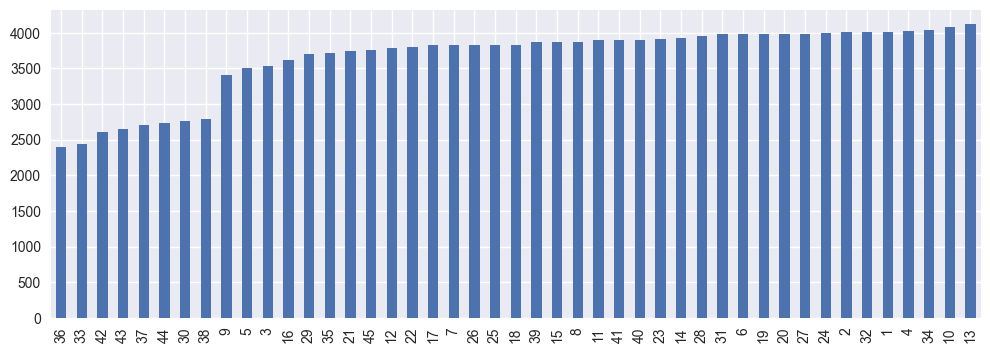

In [162]:
plt.figure(figsize=[12,4])
train_ini.Store.value_counts(ascending=True).plot.bar()
plt.show()

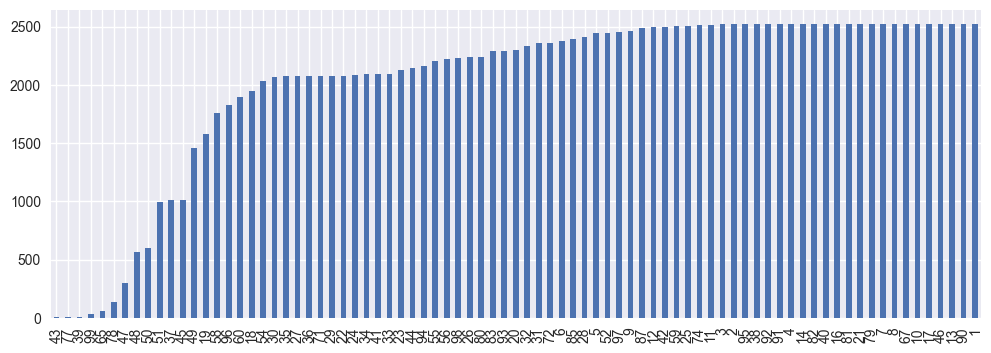

In [163]:
plt.figure(figsize=[12,4])
train_ini.Dept.value_counts(ascending=True).plot.bar()
plt.show()

In [164]:
from pandas_profiling import ProfileReport

In [41]:
profile = ProfileReport(train_ini, title='train_ini Pandas Profiling Report', explorative = True,
                       orange_mode=True)
profile

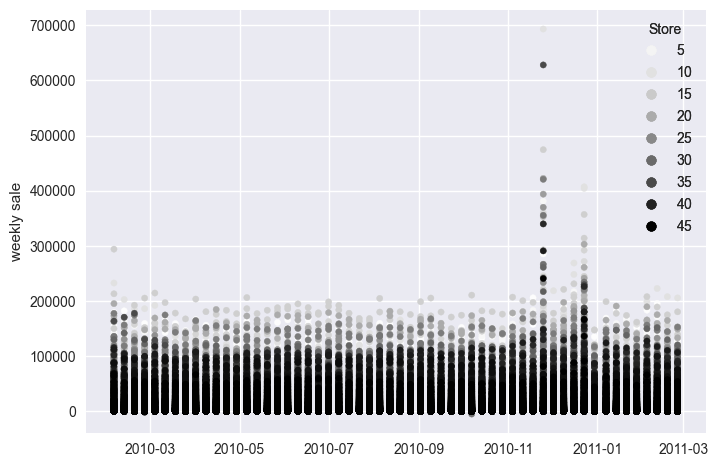

In [166]:
plt.style.use('seaborn')
fig, ax = plt.subplots()

scatter = ax.scatter(train_ini.Date, train_ini.Weekly_Sales, s=20, c=train_ini.Store, alpha=1)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    title="Store")
plt.ylabel('weekly sale')

ax.add_artist(legend1)
plt.show()

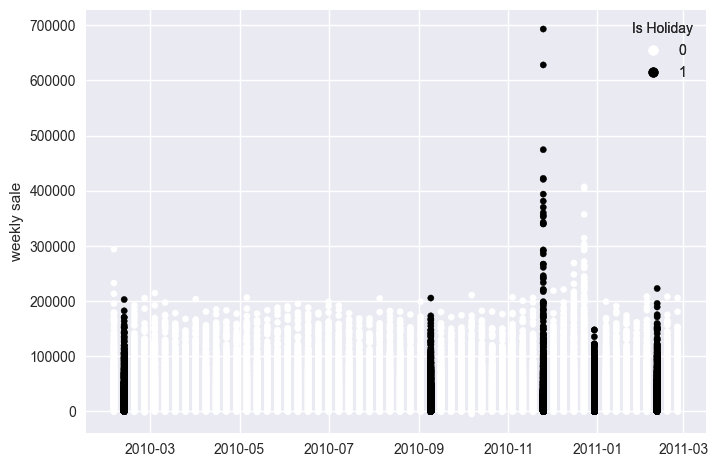

In [165]:
plt.style.use('seaborn')
fig, ax = plt.subplots()

scatter = ax.scatter(train_ini.Date, train_ini.Weekly_Sales, s=20, c=train_ini.IsHoliday, alpha=1)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    title="Is Holiday")
plt.ylabel('weekly sale')

ax.add_artist(legend1)
plt.show()

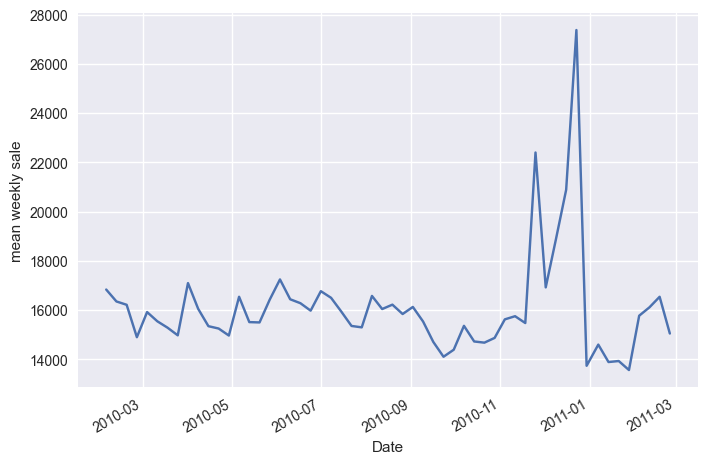

In [167]:
train_ini.groupby(by=['Date']).mean()['Weekly_Sales'].plot()
plt.ylabel('mean weekly sale')
plt.show()

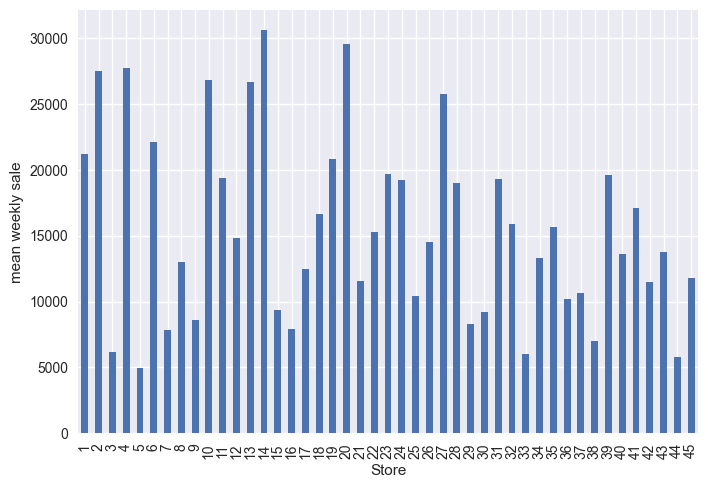

In [168]:
train_ini.groupby(by=['Store']).mean()['Weekly_Sales'].plot.bar()
plt.ylabel('mean weekly sale')

plt.show()

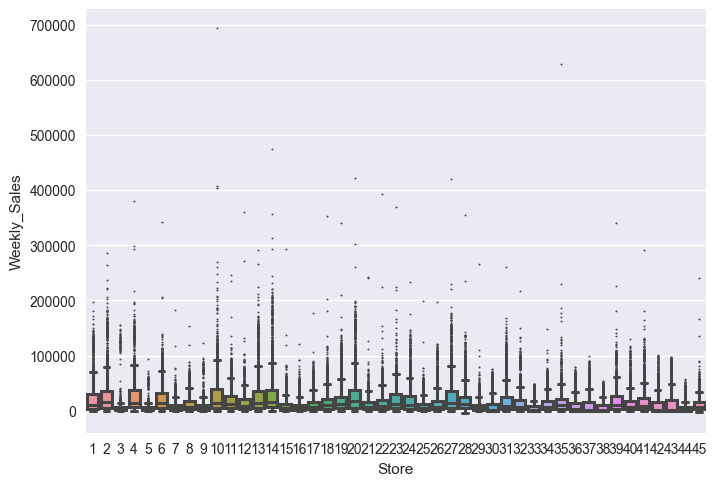

In [169]:
sns.boxplot(x="Store", y="Weekly_Sales", data=train_ini, linewidth=2.2, fliersize=0.5)
plt.show()

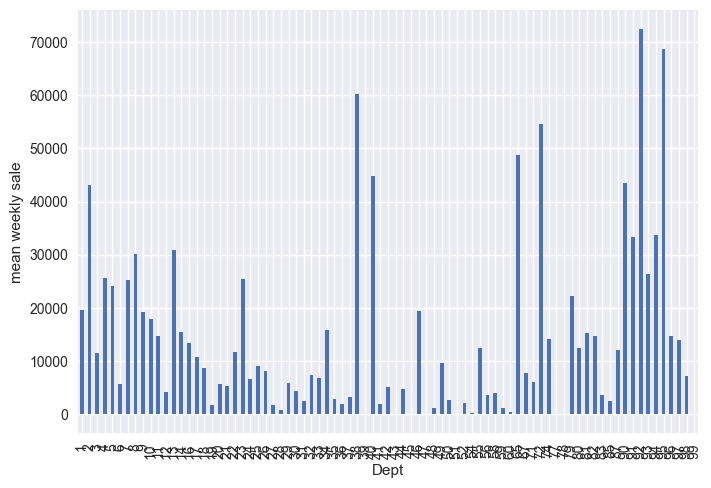

In [170]:
train_ini.groupby(by=['Dept']).mean()['Weekly_Sales'].plot.bar()
plt.ylabel('mean weekly sale')
plt.show()

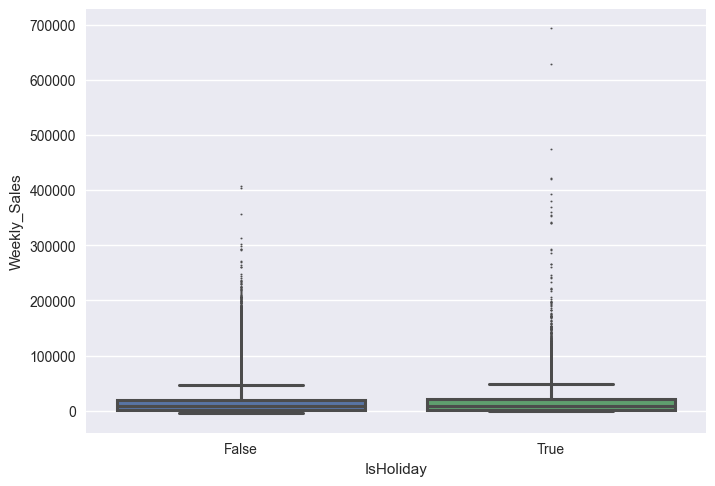

In [171]:
sns.boxplot(x="IsHoliday", y="Weekly_Sales", data=train_ini, linewidth=2.2, fliersize=0.5)
plt.show()

In [172]:
# train_ini

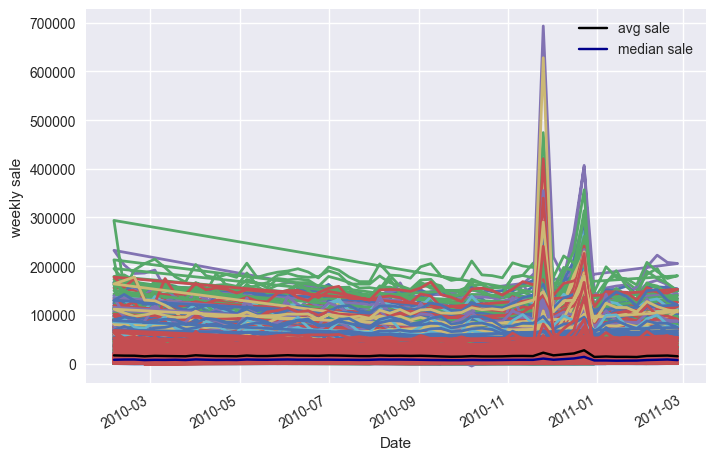

In [173]:
for st in train_ini.Store.unique():
    filt = train_ini.Store == st
    plt.plot(train_ini[filt].Date, train_ini[filt].Weekly_Sales, linewidth=2)
train_ini.groupby(by=['Date']).mean()['Weekly_Sales'].plot(c='black', label='avg sale')
train_ini.groupby(by=['Date']).median()['Weekly_Sales'].plot(c='darkblue', label='median sale')
plt.ylabel('weekly sale')
plt.legend()
plt.show()

* There are few weekly sales having negative values, we need to look into it.
* During Nov, and Dec- Holiday period, Sale is very high
* There are few stores that have low mean weekly sale and there are few having high weekly sale, hence this variable is usefull for us.
* Department wise sale is different. Hence, this is also a useful variable.